# Problems

## Problem 1: Extending the Lady Tasting Tea

[The Lady Tasting Tea experiment](https://www.irishtimes.com/news/science/how-a-tea-tasting-test-led-to-a-breakthrough-in-statistics-1.3998786) was designed by statistician Ronald A. Fisher to investigate Dr Muriel Bristol's claim that she could tell whether milk or tea was poured first into a cup. Fisher set up an experiment with 8 cups of tea, 4 with milk first and 4 with tea first, arranged in random order. Bristol had to correctly identify which cups were which.
Fisher used this setup to demonstrate how to form a null hypothesis (she is guessing) and evaluate the probability of correctly identifying all cups by chance.

Here we will extend the experiment to 12 cups of tea, 4 with milk first and 8 with tea first and simulate using `numpy`, comparing the results with the original 8 cup design.


### Import Python Modules

In [475]:
# First let's import the python modules we will be using to conduct the analysis.
# https://numpy.org/doc/stable/user/index.html
import numpy as np

# https://matplotlib.org/stable/users/index
import matplotlib.pyplot as plt

# https://docs.python.org/3/library/math.html
import math

# https://docs.python.org/3/library/itertools.html
import itertools

import random

### Original 8 cup experiment

Setting up the original 8 cup experiment we can use `math.comb(n,k)` to calculate how many ways there are of selecting 4 items out of 8, where the order of the items does not matter and no item is selected more than once. The result is 70 and tells us that if Bristol is randomly selecting cups, she only has a 1-in-70 chance of correctly identifying all 8 cups.

In [476]:
# Number of cups
#cups = 8
#milk_first = 4
#tea_first = 4

def combos(cups, milk_first):
    # https://docs.python.org/3/library/math.html#math.comb
    combinations = math.comb(cups, milk_first)
    print(f"Total combinations when choosing {milk_first} from {cups}: {combinations}")

combos(8, 4)

Total combinations when choosing 4 from 8: 70


We can further demonstrate this by labelling the cups (0, 1, 2, 3, 4, 5, 6, 7) and using `itertools.combinations` to generate a list of all the combinations of 4 cups. We can see that the length of the list is 70.

In [477]:
def labelled_combos(cups, milk_first):
    # Label the 8 cups.
    # https://numpy.org/doc/stable/reference/generated/numpy.arange.html
    labels = np.arange(cups)

    # Generate all combinations.
    # https://docs.python.org/3/library/itertools.html#itertools.combinations
    combinations = list(itertools.combinations(labels, milk_first))
    print(f"Cup labels: {labels}")
    print(f"Total combinations: {len(combinations)}")
    print(f"First 5 combinations: {combinations[:5]}")
    return labels, combinations

labelled_combos(8, 4)

Cup labels: [0 1 2 3 4 5 6 7]
Total combinations: 70
First 5 combinations: [(0, 1, 2, 3), (0, 1, 2, 4), (0, 1, 2, 5), (0, 1, 2, 6), (0, 1, 2, 7)]


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [(0, 1, 2, 3),
  (0, 1, 2, 4),
  (0, 1, 2, 5),
  (0, 1, 2, 6),
  (0, 1, 2, 7),
  (0, 1, 3, 4),
  (0, 1, 3, 5),
  (0, 1, 3, 6),
  (0, 1, 3, 7),
  (0, 1, 4, 5),
  (0, 1, 4, 6),
  (0, 1, 4, 7),
  (0, 1, 5, 6),
  (0, 1, 5, 7),
  (0, 1, 6, 7),
  (0, 2, 3, 4),
  (0, 2, 3, 5),
  (0, 2, 3, 6),
  (0, 2, 3, 7),
  (0, 2, 4, 5),
  (0, 2, 4, 6),
  (0, 2, 4, 7),
  (0, 2, 5, 6),
  (0, 2, 5, 7),
  (0, 2, 6, 7),
  (0, 3, 4, 5),
  (0, 3, 4, 6),
  (0, 3, 4, 7),
  (0, 3, 5, 6),
  (0, 3, 5, 7),
  (0, 3, 6, 7),
  (0, 4, 5, 6),
  (0, 4, 5, 7),
  (0, 4, 6, 7),
  (0, 5, 6, 7),
  (1, 2, 3, 4),
  (1, 2, 3, 5),
  (1, 2, 3, 6),
  (1, 2, 3, 7),
  (1, 2, 4, 5),
  (1, 2, 4, 6),
  (1, 2, 4, 7),
  (1, 2, 5, 6),
  (1, 2, 5, 7),
  (1, 2, 6, 7),
  (1, 3, 4, 5),
  (1, 3, 4, 6),
  (1, 3, 4, 7),
  (1, 3, 5, 6),
  (1, 3, 5, 7),
  (1, 3, 6, 7),
  (1, 4, 5, 6),
  (1, 4, 5, 7),
  (1, 4, 6, 7),
  (1, 5, 6, 7),
  (2, 3, 4, 5),
  (2, 3, 4, 6),
  (2, 3, 4, 7),
  (2, 3, 5, 6),
  (2, 3, 5, 7),
  (2, 

Let's randomly label the milk first cups. We can count the number of times each milk first cup shows up in 70 sets of possible combinations using `.intersection`.

In [478]:
def matches(cups, milk_first):
    labels, combinations = labelled_combos(cups, milk_first)
    # Label the milk first cups.
    # https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html#numpy-random-rand
    milk_first_labels = np.random.choice(labels, milk_first, replace=False)
    print(f"Milk first labels: {milk_first_labels}")
    print("First 5 sets:")

    total_matches = []
    loop = 0
    # Loop through all 70 combinations.
    for comb in combinations:
        # Return the common elements between sets.
        # https://docs.python.org/3/library/stdtypes.html#frozenset.intersection
        match = set(comb).intersection(set(milk_first_labels))
        # Add the count of common elements to a list.
        total_matches.append(len(match))
        # Print first 5 sets.
        loop += 1
        if loop < 6:
            print(f"Cups chosen: {comb}, Number of milk first cups: {len(match)}")
    
    return total_matches


matches(8, 4)

Cup labels: [0 1 2 3 4 5 6 7]
Total combinations: 70
First 5 combinations: [(0, 1, 2, 3), (0, 1, 2, 4), (0, 1, 2, 5), (0, 1, 2, 6), (0, 1, 2, 7)]
Milk first labels: [4 7 2 3]
First 5 sets:
Cups chosen: (0, 1, 2, 3), Number of milk first cups: 2
Cups chosen: (0, 1, 2, 4), Number of milk first cups: 2
Cups chosen: (0, 1, 2, 5), Number of milk first cups: 1
Cups chosen: (0, 1, 2, 6), Number of milk first cups: 1
Cups chosen: (0, 1, 2, 7), Number of milk first cups: 2


[2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 0,
 1,
 1,
 3,
 2,
 2,
 3,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 2,
 3,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 3,
 2,
 2,
 3,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 2,
 3,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 3,
 3,
 4,
 2,
 3,
 3,
 2,
 3,
 3,
 2,
 2,
 3,
 3,
 2,
 2]

We can now use `np.unique` to get the count and calculate the probability of correctly choosing 0, 1, 2, 3, or 4 cups.

Cup labels: [0 1 2 3 4 5 6 7]
Total combinations: 70
First 5 combinations: [(0, 1, 2, 3), (0, 1, 2, 4), (0, 1, 2, 5), (0, 1, 2, 6), (0, 1, 2, 7)]
Milk first labels: [7 6 0 5]
First 5 sets:
Cups chosen: (0, 1, 2, 3), Number of milk first cups: 1
Cups chosen: (0, 1, 2, 4), Number of milk first cups: 1
Cups chosen: (0, 1, 2, 5), Number of milk first cups: 2
Cups chosen: (0, 1, 2, 6), Number of milk first cups: 2
Cups chosen: (0, 1, 2, 7), Number of milk first cups: 2
Probability of choosing 0 cups correctly: 1/70
Probability of choosing 1 cups correctly: 16/70
Probability of choosing 2 cups correctly: 36/70
Probability of choosing 3 cups correctly: 16/70
Probability of choosing 4 cups correctly: 1/70


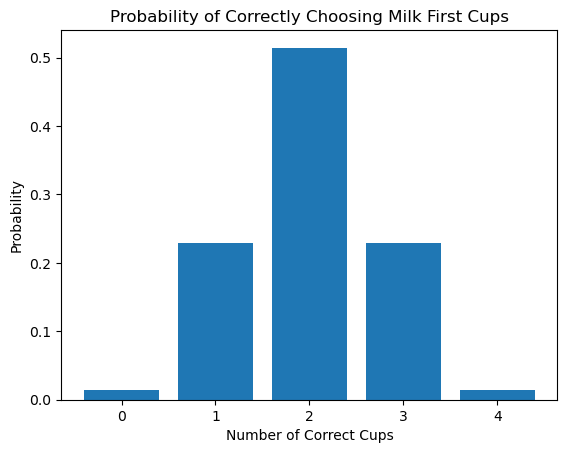

In [479]:
def plot_prob(cups, milk_first):
    total_matches = matches(cups, milk_first)
    # Get the count.
    # https://numpy.org/doc/stable/reference/generated/numpy.unique.html
    count = np.array(np.unique(total_matches, return_counts=True))

    index = 0
    for cup in original_count[0]:
        probability = f"{(count[1][index])}/{(sum(count[1]))}"
        print(f"Probability of choosing {cup} cups correctly: {probability}")
        index += 1

    # Plot the probabilities.
    fig, ax = plt.subplots()

    x = count[0]
    y = count[1]/sum(count[1])

    ax.bar(x, y)

    ax.set_title("Probability of Correctly Choosing Milk First Cups")
    ax.set_xlabel("Number of Correct Cups")
    ax.set_ylabel("Probability")

    plt.show()

plot_prob(8, 4)

### Extended 12 cup experiment

In [480]:
total_cups = 12
tea_first = 8
milk_first = 4

# https://docs.python.org/3/library/math.html#math.comb
combinations = math.comb(total_cups, milk_first)
combinations

495

In [481]:
cup_labels = list(range(total_cups))
milk_first_labels = random.sample(cup_labels,4)

cup_labels, milk_first_labels

guess = np.random.choice(cup_labels, milk_first, replace=False)

count = 0
guess_list = []

while set(guess) != set(milk_first_labels):
    guess = np.random.choice(cup_labels, milk_first, replace=False)
    guess_list.append(guess)
    count += 1

print(milk_first_labels)
print(count)
print(guess, guess.dtype)

count1=0
while count1<1000:
    guess = list(np.random.choice(cup_labels, milk_first, replace=False))
    guess_list.append(guess)
    count1 += 1

print(milk_first_labels)
print(count1)


[2, 5, 7, 11]
123
[ 7  5 11  2] int32


[2, 5, 7, 11]
1000


[2, 5, 7, 11]
1 [10  6 11  9] {11}
1 [6 5 1 8] {5}
0 [ 1  0  3 10] set()
1 [ 0  6 11 10] {11}
1 [10  3  1  5] {5}
1 [ 8 11  3  6] {11}
2 [ 8  6  2 11] {2, 11}
2 [5 8 1 7] {5, 7}
1 [ 1  4 10  5] {5}
1 [9 3 8 7] {7}
1 [8 7 1 9] {7}
1 [ 4  8 10  5] {5}
0 [8 0 4 9] set()
2 [ 0 10  5  2] {2, 5}
2 [11  8  4  2] {2, 11}
1 [4 1 9 2] {2}
2 [2 7 6 9] {2, 7}
2 [ 9  7 10 11] {11, 7}
0 [6 0 1 8] set()
2 [ 7  6  8 11] {11, 7}
2 [11  7  3  0] {11, 7}
2 [10  7  4  5] {5, 7}
2 [ 7  8 11  4] {11, 7}
1 [1 9 4 5] {5}
2 [2 6 9 7] {2, 7}
1 [4 0 6 2] {2}
2 [ 8  7  5 10] {5, 7}
1 [ 1 11  4  0] {11}
1 [10  3  0  7] {7}
2 [1 5 2 0] {2, 5}
0 [4 6 8 0] set()
1 [ 1  7 10  6] {7}
2 [ 5  2  1 10] {2, 5}
2 [0 8 5 7] {5, 7}
3 [7 2 4 5] {2, 5, 7}
2 [11  4  2  8] {2, 11}
1 [9 2 3 4] {2}
0 [ 8 10  3  6] set()
1 [6 8 0 7] {7}
2 [ 7  8 10  5] {5, 7}
2 [ 2  0  5 10] {2, 5}
0 [8 9 0 6] set()
1 [9 0 5 3] {5}
2 [11  5 10  3] {11, 5}
1 [ 0 10  7  3] {7}
1 [9 5 0 4] {5}
1 [ 4  9 10  7] {7}
0 [3 0 4 1] set()
2 [7 3 0 2] {2, 7}
2 

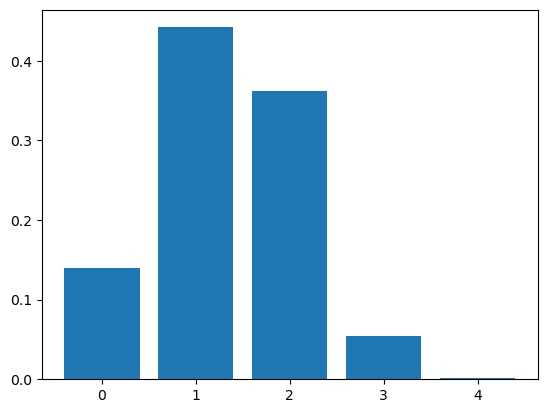

In [482]:
print(milk_first_labels)

samples = np.array([np.random.choice(cup_labels, milk_first, replace=False) for i in range(1000)])


total_matches = []
for sample in samples:
    match = set(sample).intersection(set(milk_first_labels))
    total_matches.append(len(match))
    print(len(match), sample, match)

counts12 = np.unique(total_matches, return_counts=True)
counts12

fig, ax = plt.subplots()

ax.bar(counts12[0], counts12[1]/1000)

plt.show()

In [483]:
combs = list(itertools.combinations(cup_labels, milk_first))
combs

[(0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 2, 5),
 (0, 1, 2, 6),
 (0, 1, 2, 7),
 (0, 1, 2, 8),
 (0, 1, 2, 9),
 (0, 1, 2, 10),
 (0, 1, 2, 11),
 (0, 1, 3, 4),
 (0, 1, 3, 5),
 (0, 1, 3, 6),
 (0, 1, 3, 7),
 (0, 1, 3, 8),
 (0, 1, 3, 9),
 (0, 1, 3, 10),
 (0, 1, 3, 11),
 (0, 1, 4, 5),
 (0, 1, 4, 6),
 (0, 1, 4, 7),
 (0, 1, 4, 8),
 (0, 1, 4, 9),
 (0, 1, 4, 10),
 (0, 1, 4, 11),
 (0, 1, 5, 6),
 (0, 1, 5, 7),
 (0, 1, 5, 8),
 (0, 1, 5, 9),
 (0, 1, 5, 10),
 (0, 1, 5, 11),
 (0, 1, 6, 7),
 (0, 1, 6, 8),
 (0, 1, 6, 9),
 (0, 1, 6, 10),
 (0, 1, 6, 11),
 (0, 1, 7, 8),
 (0, 1, 7, 9),
 (0, 1, 7, 10),
 (0, 1, 7, 11),
 (0, 1, 8, 9),
 (0, 1, 8, 10),
 (0, 1, 8, 11),
 (0, 1, 9, 10),
 (0, 1, 9, 11),
 (0, 1, 10, 11),
 (0, 2, 3, 4),
 (0, 2, 3, 5),
 (0, 2, 3, 6),
 (0, 2, 3, 7),
 (0, 2, 3, 8),
 (0, 2, 3, 9),
 (0, 2, 3, 10),
 (0, 2, 3, 11),
 (0, 2, 4, 5),
 (0, 2, 4, 6),
 (0, 2, 4, 7),
 (0, 2, 4, 8),
 (0, 2, 4, 9),
 (0, 2, 4, 10),
 (0, 2, 4, 11),
 (0, 2, 5, 6),
 (0, 2, 5, 7),
 (0, 2, 5, 8),
 (0, 2, 5, 9),
 (0, 2, 5, 10),
 (

In [484]:
len(combs)

495

In [485]:
total_overlap = []

for comb in combs:
    overlap = set(comb).intersection(set(milk_first_labels))
    print(len(overlap), comb, overlap)
    total_overlap.append(len(overlap))

1 (0, 1, 2, 3) {2}
1 (0, 1, 2, 4) {2}
2 (0, 1, 2, 5) {2, 5}
1 (0, 1, 2, 6) {2}
2 (0, 1, 2, 7) {2, 7}
1 (0, 1, 2, 8) {2}
1 (0, 1, 2, 9) {2}
1 (0, 1, 2, 10) {2}
2 (0, 1, 2, 11) {2, 11}
0 (0, 1, 3, 4) set()
1 (0, 1, 3, 5) {5}
0 (0, 1, 3, 6) set()
1 (0, 1, 3, 7) {7}
0 (0, 1, 3, 8) set()
0 (0, 1, 3, 9) set()
0 (0, 1, 3, 10) set()
1 (0, 1, 3, 11) {11}
1 (0, 1, 4, 5) {5}
0 (0, 1, 4, 6) set()
1 (0, 1, 4, 7) {7}
0 (0, 1, 4, 8) set()
0 (0, 1, 4, 9) set()
0 (0, 1, 4, 10) set()
1 (0, 1, 4, 11) {11}
1 (0, 1, 5, 6) {5}
2 (0, 1, 5, 7) {5, 7}
1 (0, 1, 5, 8) {5}
1 (0, 1, 5, 9) {5}
1 (0, 1, 5, 10) {5}
2 (0, 1, 5, 11) {11, 5}
1 (0, 1, 6, 7) {7}
0 (0, 1, 6, 8) set()
0 (0, 1, 6, 9) set()
0 (0, 1, 6, 10) set()
1 (0, 1, 6, 11) {11}
1 (0, 1, 7, 8) {7}
1 (0, 1, 7, 9) {7}
1 (0, 1, 7, 10) {7}
2 (0, 1, 7, 11) {11, 7}
0 (0, 1, 8, 9) set()
0 (0, 1, 8, 10) set()
1 (0, 1, 8, 11) {11}
0 (0, 1, 9, 10) set()
1 (0, 1, 9, 11) {11}
1 (0, 1, 10, 11) {11}
1 (0, 2, 3, 4) {2}
2 (0, 2, 3, 5) {2, 5}
1 (0, 2, 3, 6) {2}
2 (0, 2, 3

In [486]:
counts = np.unique(total_overlap, return_counts=True)
counts
counts2 = np.array([counts[0], counts[1]])
counts2

array([[  0,   1,   2,   3,   4],
       [ 70, 224, 168,  32,   1]], dtype=int64)

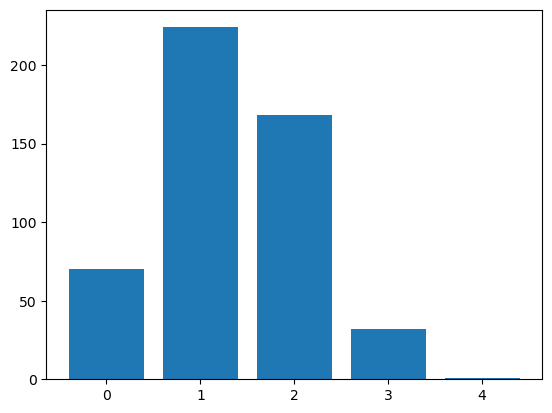

In [487]:
fig, ax = plt.subplots()

ax.bar(counts[0], counts[1])

plt.show()

## Problem 2: Normal Distribution

## Problem 3: t-Tests

## Problem 4: ANOVA

## End